# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [5]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [6]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

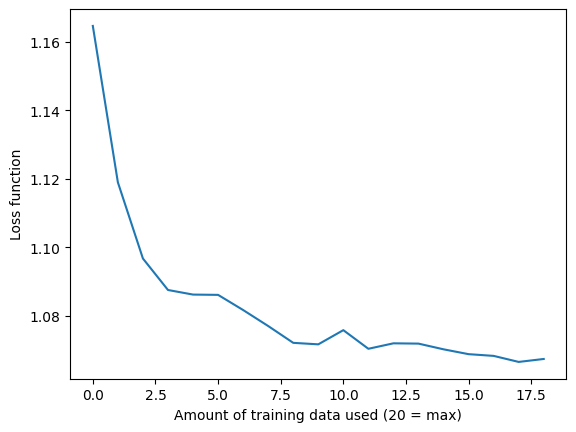

In [7]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [8]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

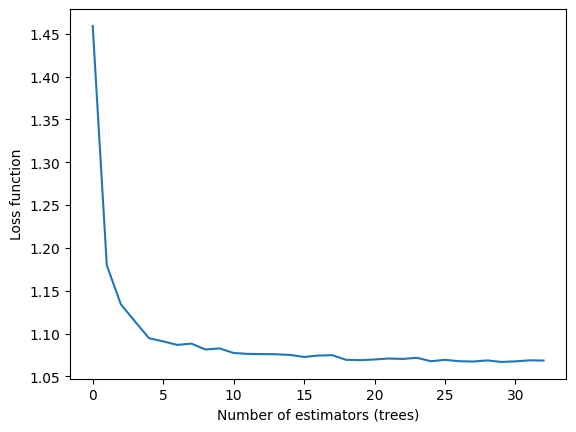

In [9]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [10]:
import pandas as pd

# The first dataset is Global Renewable Energy Production (2000–2022) 

# Load the dataset
df_ren1 = pd.read_csv("IRENA_RenewableEnergy_Statistics_2000-2022.csv", encoding = 'latin -1')

# Peek at the data
print(df_ren1.shape)
print(df_ren1.columns)
df_ren1.head()


(35193, 12)
Index(['Region', 'Sub-region', 'Country', 'ISO3 code', 'M49 code',
       'RE or Non-RE', 'Group Technology', 'Technology', 'Producer Type',
       'Year', 'Electricity Generation (GWh)',
       'Electricity Installed Capacity (MW)'],
      dtype='object')


,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
0,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2000,24585.0,5459.01
1,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2001,25781.0,5455.50
2,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2002,26994.0,5891.01
3,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2003,28619.4,6013.24
4,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2004,30312.0,6305.24


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, max_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values and focus on relevant columns
df_ren1 = df_ren1[['Electricity Generation (GWh)', 'Group Technology', 'Electricity Installed Capacity (MW)']].dropna()

# Encode categorical variables
le_country = LabelEncoder()
le_tech = LabelEncoder()
df_ren1['Group Technology'] = le_tech.fit_transform(df_ren1['Group Technology'])

# Features and target
X = df_ren1[['Electricity Generation (GWh)', 'Group Technology']]
y = df_ren1['Electricity Installed Capacity (MW)']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Hyperparameter tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best model after tuning
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(f"\nBest Hyperparameters: {random_search.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"Max Error: {max_err:.2f}")
print(f"RMSE: {rmse:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
R² Score: 0.9576
Max Error: 169939.21
RMSE: 5700.42


The model has high r2 score, meaning it can accuretly precit capacity based on the inputs. The max error number is high, but considering I'm modeling global-scale energy capacities (often in hundreds of thousands or millions of MW), it's within reason.For context: large countries like China or the US add renewable capacity in the range of hundreds of gigawatts.

 RMSE is very acceptable average error relative to the scale of my predictions (~5,000 MW across projects and countries from 2000–2022).



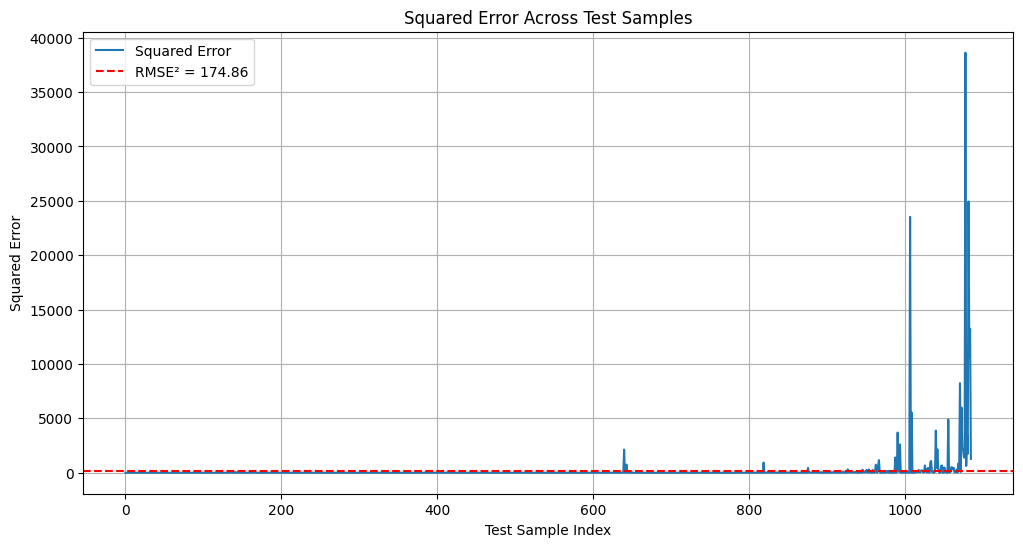

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (errors)
residuals = y_test - y_pred
squared_errors = residuals ** 2

# Create a DataFrame for easier plotting
rmse_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Squared Error': squared_errors
})

# Sort values for a clean line plot
rmse_df = rmse_df.sort_values('Actual').reset_index(drop=True)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=rmse_df, x=rmse_df.index, y='Squared Error', label='Squared Error')
plt.axhline(rmse**2, color='red', linestyle='--', label=f'RMSE² = {rmse**2:.2f}')
plt.title('Squared Error Across Test Samples')
plt.xlabel('Test Sample Index')
plt.ylabel('Squared Error')
plt.legend()
plt.grid(True)
plt.show()


I see a few massive spikes, the model screwed up some predictions badly (even if the overall RMSE looks low).

The red dashed line shows the average squared error for context.

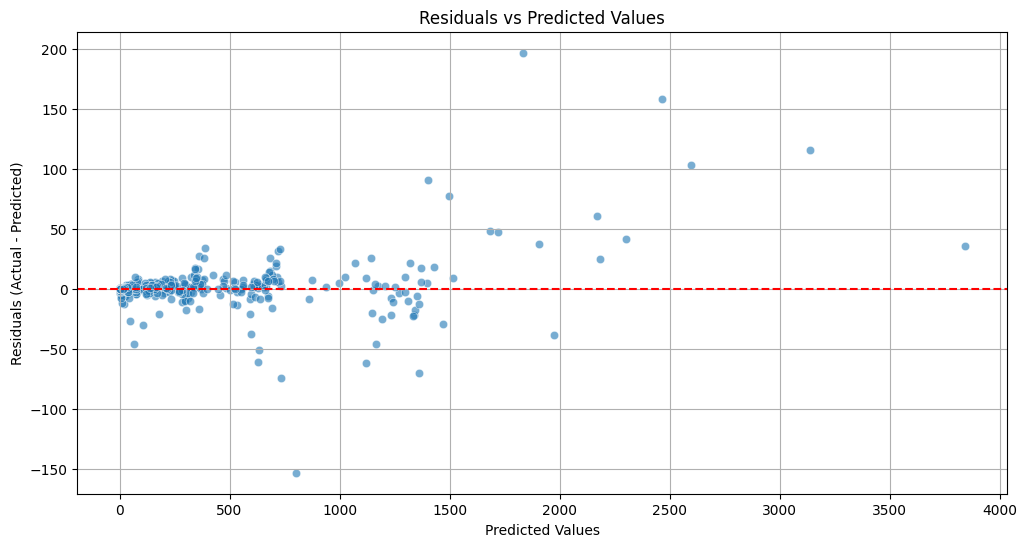

In [25]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

In [13]:
import pandas as pd

# This is the dataset for Evolution of Modern Renewable Energy (1965–2021)

# Load the dataset
df_ren2 = pd.read_csv("02 modern-renewable-energy-consumption.csv", encoding = 'latin -1')

# Peek at the data
print(df_ren2.shape)
print(df_ren2.columns)
df_ren2.head()

(5610, 7)
Index(['Entity', 'Code', 'Year', 'Geo Biomass Other - TWh',
       'Solar Generation - TWh', 'Wind Generation - TWh',
       'Hydro Generation - TWh'],
      dtype='object')


,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Africa,NaN,1971,0.164,0.0,0.0,26.013390
1,Africa,NaN,1972,0.165,0.0,0.0,29.633196
2,Africa,NaN,1973,0.170,0.0,0.0,31.345707
3,Africa,NaN,1974,0.175,0.0,0.0,35.667076
4,Africa,NaN,1975,0.172,0.0,0.0,37.717968


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, max_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values and focus on relevant columns
df_ren2 = df_ren2[['Entity', 'Year', 'Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh']].dropna()

# Encode categorical variables
le_country = LabelEncoder()
le_tech = LabelEncoder()
df_ren2['Entity'] = le_country.fit_transform(df_ren2['Entity'])

# Features and target
X = df_ren2[['Entity', 'Year', 'Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh']]
y = df_ren2['Hydro Generation - TWh']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Hyperparameter tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best model after tuning
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(f"\nBest Hyperparameters: {random_search.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"Max Error: {max_err:.2f}")
print(f"RMSE: {rmse:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits



Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40}
R² Score: 0.9987
Max Error: 196.51
RMSE: 13.22


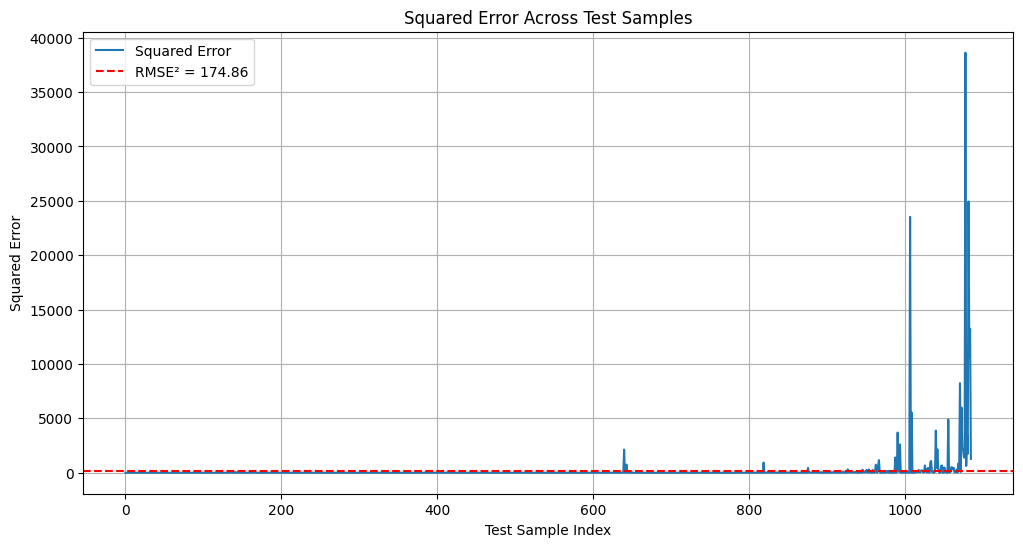

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (errors)
residuals = y_test - y_pred
squared_errors = residuals ** 2

# Create a DataFrame for easier plotting
rmse_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Squared Error': squared_errors
})

# Sort by Actual values for cleaner visualization
rmse_df = rmse_df.sort_values('Actual').reset_index(drop=True)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=rmse_df, x=rmse_df.index, y='Squared Error', label='Squared Error')
plt.axhline(rmse**2, color='red', linestyle='--', label=f'RMSE² = {rmse**2:.2f}')
plt.title('Squared Error Across Test Samples')
plt.xlabel('Test Sample Index')
plt.ylabel('Squared Error')
plt.legend()
plt.grid(True)
plt.show()


Most samples have low error (close to zero). But there's a huge spike toward the right side. Some specific samples have enormous errors (outliers).

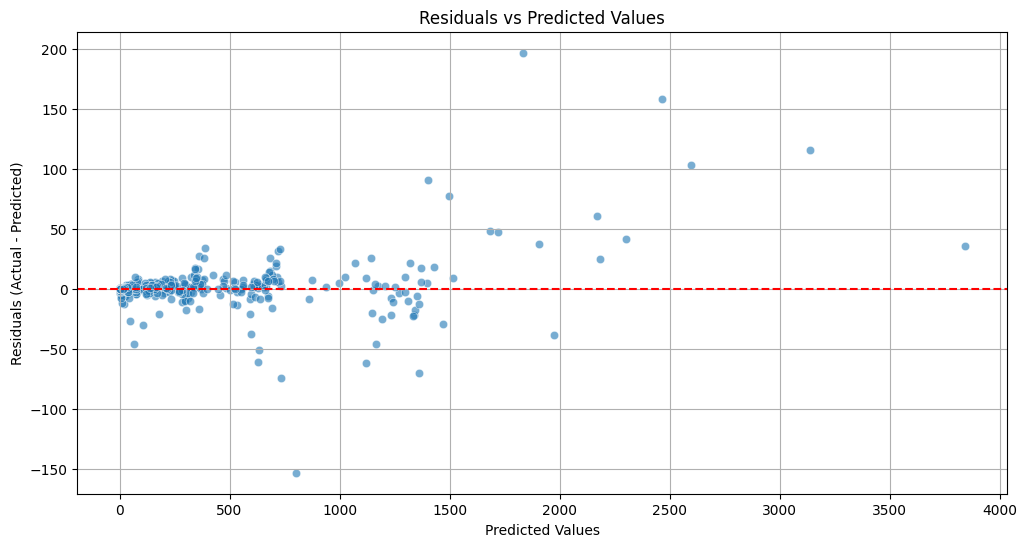

In [22]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


Around small to medium predicted values, residuals are tightly clustered around zero, which is good. As the predictions get bigger, the spread of residuals widens and the model gets sloppier for larger energy outputs.

There’s no obvious systematic bias like a curve up or down, which means no severe underfitting or overfitting trend.

In [29]:
# This is the dataset for U.S. Energy Generation (2001–2022) 

us_energy = pd.read_excel("/Users/sohan/Documents/US_Gen")

us_energy = us_energy.drop(columns=['Unnamed: 0'])

# Check the basic information of the dataset
print(us_energy.info())

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sohan/Documents/US_Gen'

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight'

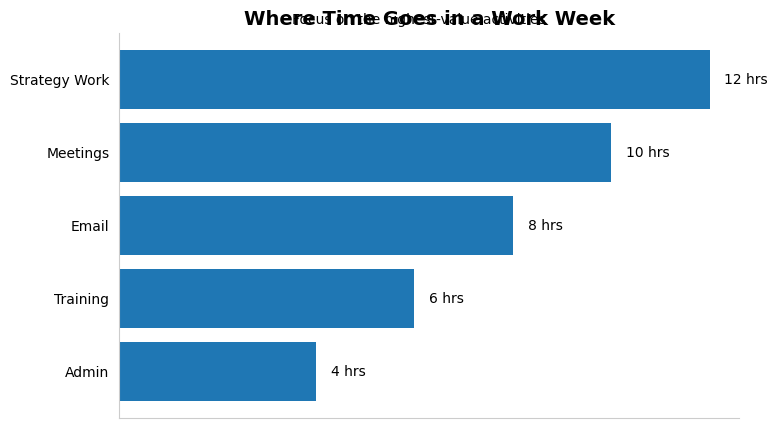

In [ ]:
import matplotlib.pyplot as plt

# Fake but realistic data
categories = ['Email', 'Meetings', 'Strategy Work', 'Admin', 'Training']
hours = [8, 10, 12, 4, 6]

# Sort for better visual flow
sorted_data = sorted(zip(hours, categories))
hours_sorted, categories_sorted = zip(*sorted_data)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(categories_sorted, hours_sorted, color='#1f77b4')

# Add direct labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.3, bar.get_y() + bar.get_height()/2,
            f'{width} hrs', va='center', fontsize=10)

# Remove clutter
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.grid(False)
ax.set_xticks([])

# Add title and subtitle
ax.set_title("Where Time Goes in a Work Week", fontsize=14, fontweight='bold')
plt.suptitle("Focus on the highest-value activities", fontsize=10, y=0.92)

# Tight layout
plt.tight
